# Proyecto de regresión líneal

## Cargar dataframe

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
# Leer el archivo CSV desde la URL y cargarlo en un DataFrame

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Columna Descripción**

- `age`: Edad del beneficiario principal (numérico).
- `sex`: Género del beneficiario principal (categórico).
- `bmi`: índice de masa corporal (numérico).
- `children`: Número de niños/dependientes cubiertos por un seguro médico (numérico).
- `smoker`: ¿Es fumador? (categórico).
- `region`: Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico).
- `charges`: Prima del seguro médico (numérico).


In [3]:
# Guardar el dataframe en un archivo CSV en la carpeta raw

df.to_csv("/workspaces/efrainnalmeida-proyecto-regresion-lineal-final/data/raw/medical_insurance_cost.csv", index=False)

In [4]:
# Extraer de la carpeta raw el archivo CSV y cargarlo en un DataFrame

df_interim = pd.read_csv("/workspaces/efrainnalmeida-proyecto-regresion-lineal-final/data/raw/medical_insurance_cost.csv")

df_interim.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Guardar el dataframe en un archivo CSV en la carpeta interim

df_interim.to_csv("/workspaces/efrainnalmeida-proyecto-regresion-lineal-final/data/interim/medical_insurance_cost.csv", index=False)

## EDA

### Información general

In [6]:
# Información general del DataFrame

print("\nInformación general:")
df_interim.info()


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Estadísticas descriptivas

print("\nEstadísticas descriptivas:")
df_interim.describe(include='all')


Estadísticas descriptivas:


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Análisis de valores faltantes

In [8]:
# Comprobación de valores nulos

print("\nValores nulos por columna:")
df_interim.isnull().sum()


Valores nulos por columna:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Análisis de valores duplicados

In [9]:
# Detección de registros duplicados

print("\nNúmero de registros duplicados:")
df_interim.duplicated().sum()


Número de registros duplicados:


np.int64(1)

In [10]:
# Eliminar el registro duplicado

df_interim = df_interim.drop_duplicates().reset_index(drop=True)

print("\nNúmero de registros duplicados después de eliminar:")
df_interim.duplicated().sum()


Número de registros duplicados después de eliminar:


np.int64(0)

In [11]:
# Guardar el dataframe en un archivo CSV en la carpeta interim

df_interim.to_csv("/workspaces/efrainnalmeida-proyecto-regresion-lineal-final/data/interim/medical_insurance_cost.csv", index=False)

df_interim.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Información general del DataFrame

print("\nInformación general:")
df_interim.info()


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Análisis de outliers

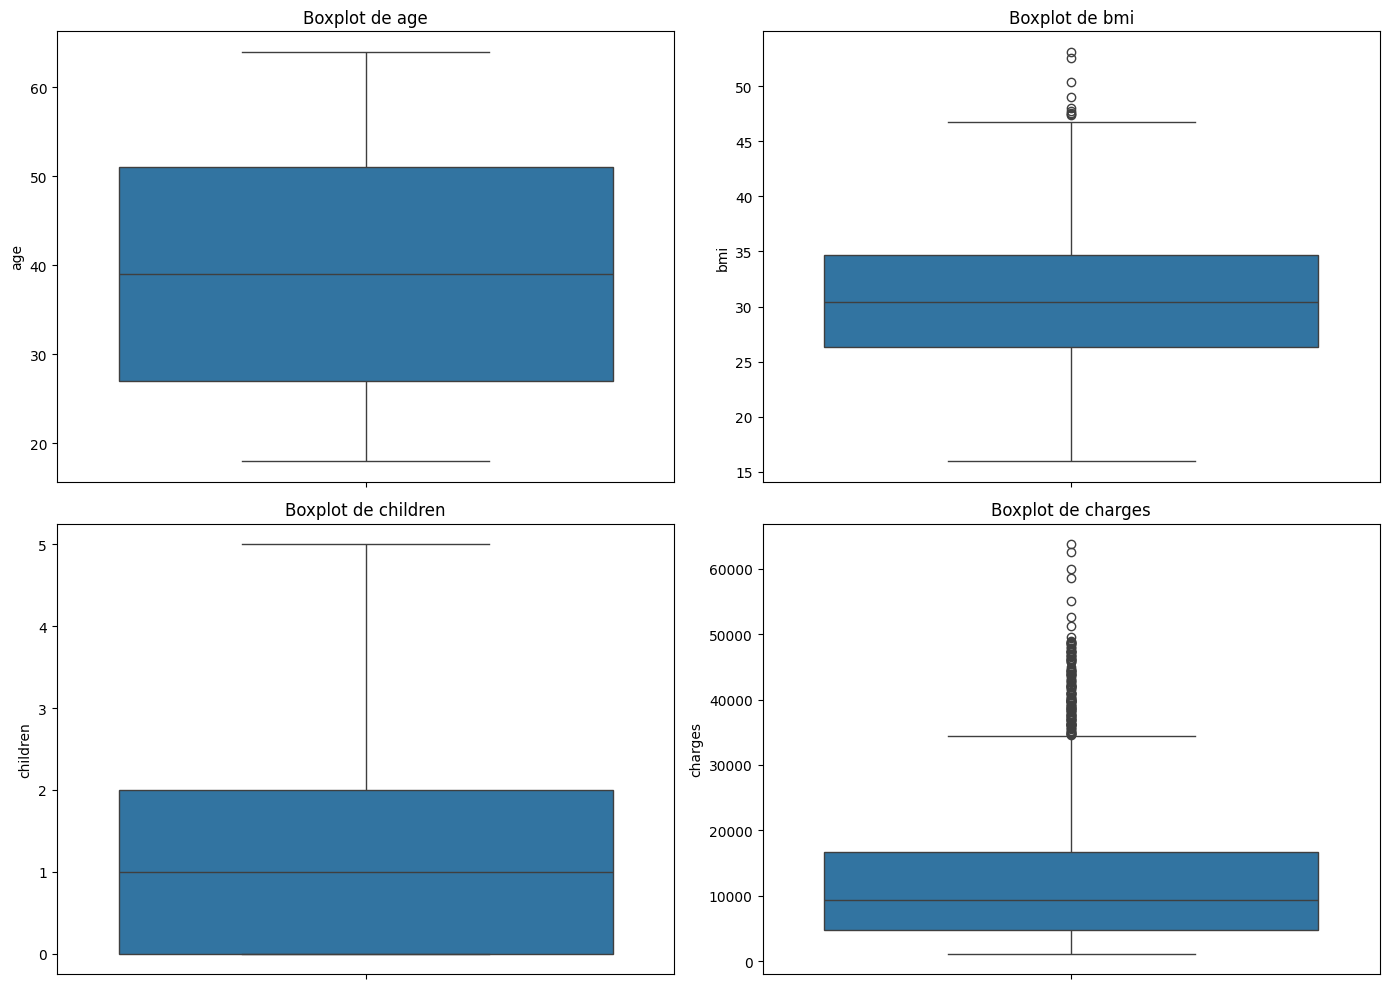

In [13]:
# Outliers

# Lista de variables numéricas
numeric_vars = ["age", "bmi", "children", "charges"]

# Crear boxplots
plt.figure(figsize=(14, 10))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_interim[var])
    plt.title(f"Boxplot de {var}")
plt.tight_layout()
plt.show()

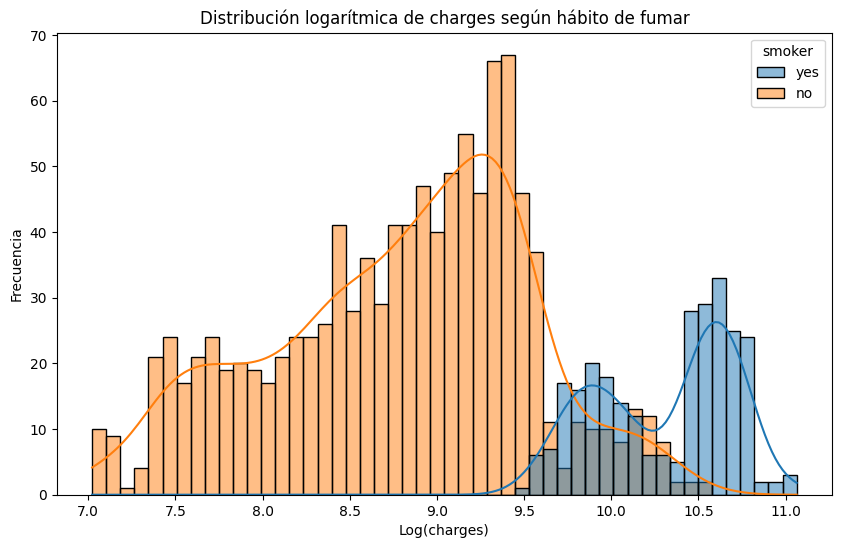

In [14]:
# Crear histograma logarítmico para charges por fumador/no fumador

plt.figure(figsize=(10,6))
sns.histplot(data=df_interim, x=np.log(df_interim["charges"]), hue="smoker", kde=True, bins=50)
plt.title("Distribución logarítmica de charges según hábito de fumar")
plt.xlabel("Log(charges)")
plt.ylabel("Frecuencia")
plt.show()

### Escalado de valores

In [15]:
# Seleccionar variables categóricas (tipo object)
categorical_vars = df_interim.select_dtypes(include=["object"]).columns.tolist()

# Seleccionar variables numéricas (excluyendo la variable original y la logarítmica de charges)
numeric_vars = df_interim.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_vars = [var for var in numeric_vars if var not in ["charges", "log_charges"]]

# Mostrar resultados
print("Variables categóricas:", categorical_vars)
print("Variables numéricas:", numeric_vars)

Variables categóricas: ['sex', 'smoker', 'region']
Variables numéricas: ['age', 'bmi', 'children']


In [16]:
# Aplicar One-Hot Encoding a las variables categóricas
df_encoded = pd.get_dummies(df_interim, columns=categorical_vars, drop_first=True)

# Verificar las nuevas columnas
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [17]:
# Separar variables predictoras (X) y variable objetivo (y)

X = df_encoded.drop(columns=["charges"])
y = df_encoded["charges"]

# Dividir en conjunto de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de entrenamiento:", y_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Tamaño del conjunto de prueba:", y_test.shape)

Tamaño del conjunto de entrenamiento: (1069, 8)
Tamaño del conjunto de entrenamiento: (1069,)
Tamaño del conjunto de prueba: (268, 8)
Tamaño del conjunto de prueba: (268,)


In [18]:
# Instanciar el escalador
scaler = MinMaxScaler()

# Ajustar sobre train y transformar ambos datasets
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])

### Selección de características

In [19]:
# Selección de las mejores k características (por ejemplo, 10)
k = 4  # puedes ajustar este número

# Inicializar selector con f_regression
selector = SelectKBest(score_func=f_regression, k=k)

# Ajustar selector sobre X_train y y_train
X_train_selected = selector.fit_transform(X_train, y_train)

# Aplicar la misma transformación a X_test
X_test_selected = selector.transform(X_test)

# Obtener nombres de las columnas seleccionadas
selected_features = X_train.columns[selector.get_support()].tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas:")
for feature in selected_features:
    print("-", feature)

Características seleccionadas:
- age
- bmi
- children
- smoker_yes


In [20]:
# Mostrar puntajes de cada variable
feature_scores = pd.DataFrame({
    "Feature": X_train.columns,
    "Score": selector.scores_
}).sort_values(by="Score", ascending=False)

print(feature_scores)

            Feature        Score
4        smoker_yes  1595.703256
0               age    97.746352
1               bmi    35.091493
2          children     7.982326
6  region_southeast     6.688597
3          sex_male     3.876616
5  region_northwest     3.232139
7  region_southwest     1.384858


In [21]:
# Crear DataFrames alineados con las variables seleccionadas

X_train_kbest = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_test_kbest = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)

In [22]:
# Añadir la variable objetivo

X_train_kbest["charges"] = y_train
X_test_kbest["charges"] = y_test

In [23]:
# Verificar

print("X_train_kbest:")
print(X_train_kbest.head())
print("\nX_test_kbest:")
print(X_test_kbest.head())

X_train_kbest:
           age       bmi  children  smoker_yes      charges
1113  0.108696  0.230024       0.0         0.0   2396.09590
967   0.065217  0.263250       0.4         0.0   3279.86855
598   0.739130  0.580172       0.4         0.0  33471.97189
170   0.978261  0.686306       0.0         0.0  13405.39030
275   0.630435  0.286252       0.4         0.0   9715.84100

X_test_kbest:
           age       bmi  children  smoker_yes      charges
899   0.673913  0.176352       0.0         0.0   8688.85885
1063  0.239130  0.259349       0.8         0.0   5708.86700
1255  0.717391  0.549502       0.6         0.0  11436.73815
298   0.282609  0.495830       0.6         1.0  38746.35510
237   0.282609  0.603444       0.4         0.0   4463.20510


### Guardar los datos limpios

In [24]:
X_train_kbest.to_csv("/workspaces/efrainnalmeida-proyecto-regresion-lineal-final/data/processed/clean_train.csv", index=False)
X_test_kbest.to_csv("/workspaces/efrainnalmeida-proyecto-regresion-lineal-final/data/processed/clean_test.csv", index=False)

## Modelo de regresión líneal

### Cargar clean_train.csv y clean_test.csv como df_train y df_test

In [25]:
# Leer los archivos CSV desde la carpeta processed y cargarlos en DataFrames

df_train = pd.read_csv("/workspaces/efrainnalmeida-proyecto-regresion-lineal-final/data/processed/clean_train.csv")
df_test = pd.read_csv("/workspaces/efrainnalmeida-proyecto-regresion-lineal-final/data/processed/clean_test.csv")

In [26]:
# Verificar el DataFrame de entrenamiento

print(df_train.shape)
df_train.head()


(1069, 5)


,age,bmi,children,smoker_yes,charges
0,0.108696,0.230024,0.0,0.0,2396.09590
1,0.065217,0.263250,0.4,0.0,3279.86855
2,0.739130,0.580172,0.4,0.0,33471.97189
3,0.978261,0.686306,0.0,0.0,13405.39030
4,0.630435,0.286252,0.4,0.0,9715.84100


In [27]:
# Verificar el DataFrame de prueba

print(df_test.shape)
df_test.head()

(268, 5)


,age,bmi,children,smoker_yes,charges
0,0.673913,0.176352,0.0,0.0,8688.85885
1,0.239130,0.259349,0.8,0.0,5708.86700
2,0.717391,0.549502,0.6,0.0,11436.73815
3,0.282609,0.495830,0.6,1.0,38746.35510
4,0.282609,0.603444,0.4,0.0,4463.20510


### Línea de regresión y Heatmap de correlación

#### Concatenar df_train y df_test

In [28]:
# Concatenar ambos DataFrames
df_total = pd.concat([df_train, df_test], ignore_index=True)

# Verificamos que charges esté presente
print(df_total.shape)
df_total.head()

(1337, 5)


,age,bmi,children,smoker_yes,charges
0,0.108696,0.230024,0.0,0.0,2396.09590
1,0.065217,0.263250,0.4,0.0,3279.86855
2,0.739130,0.580172,0.4,0.0,33471.97189
3,0.978261,0.686306,0.0,0.0,13405.39030
4,0.630435,0.286252,0.4,0.0,9715.84100


#### Regplots: Variables independientes vs. `charges`

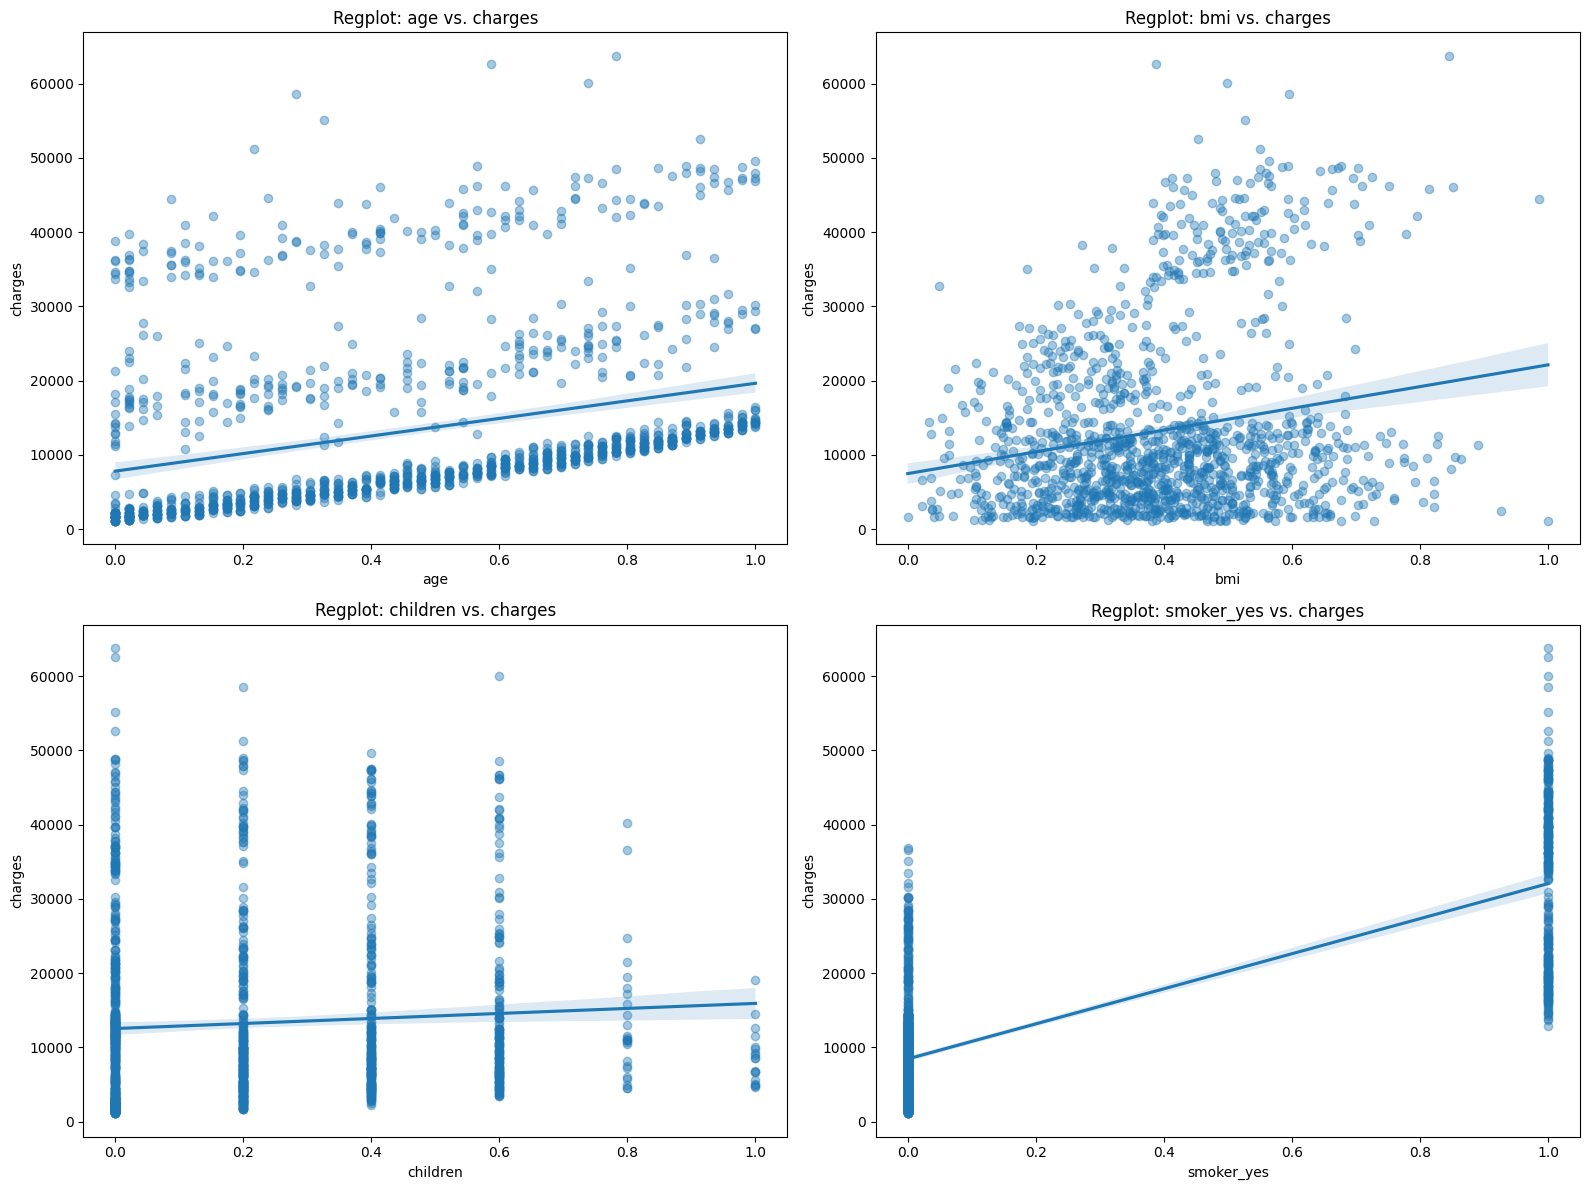

In [29]:
# Variables independientes
independent_vars = ["age", "bmi", "children", "smoker_yes"]

# Crear regplots
plt.figure(figsize=(16, 12))
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=var, y="charges", data=df_total, scatter_kws={"alpha":0.4})
    plt.title(f"Regplot: {var} vs. charges")
plt.tight_layout()
plt.show()

#### Heatmap de correlación

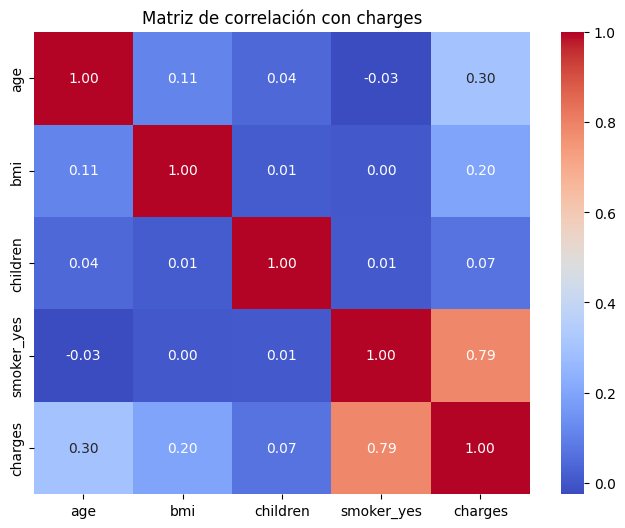

In [30]:
# Variables para la matriz de correlación
corr_vars = independent_vars + ["charges"]

# Calcular matriz de correlación
correlation_matrix = df_total[corr_vars].corr()

# Graficar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación con charges")
plt.show()

#### Establecer X_train, y_train, X_test, y_test

In [31]:
X_train = df_train.drop(["charges"], axis = 1)
y_train = df_train["charges"]
X_test = df_test.drop(["charges"], axis = 1)
y_test = df_test["charges"]

#### Modelo

##### Entrenar el modelo

In [32]:
# Instanciar el modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

##### Hacer predicciones

In [33]:
# Predicciones sobre el conjunto de prueba

y_pred = model.predict(X_test)

##### Evaluar el modelo

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 4198.59
MSE: 35914551.48
RMSE: 5992.88
R²: 0.8046


##### Gráfico de dispersión `y_test` vs. `y_pred`

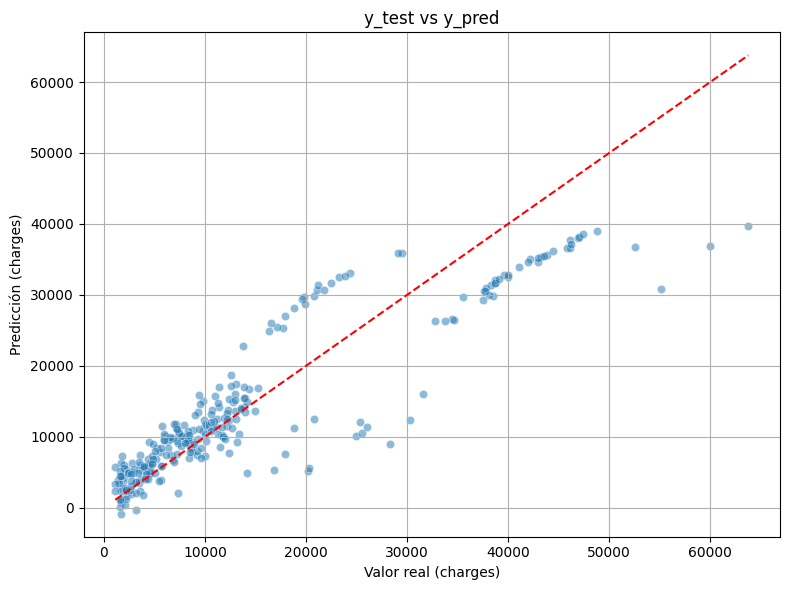

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea de referencia
plt.xlabel("Valor real (charges)")
plt.ylabel("Predicción (charges)")
plt.title("y_test vs y_pred")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Coeficientes del modelo

In [36]:
# Obtener nombres de las variables
features = X_train.columns

# Obtener coeficientes
coefficients = model.coef_

# Crear DataFrame para visualizar
coef_df = pd.DataFrame({
    "Variable": features,
    "Coeficiente": coefficients
})

# Ordenar por magnitud del coeficiente
coef_df = coef_df.sort_values(by="Coeficiente", key=abs, ascending=False)

print(coef_df)

     Variable   Coeficiente
3  smoker_yes  23042.507238
0         age  11462.799432
1         bmi  11346.789395
2    children   2689.860980


| Variable     | Coeficiente   | Interpretación |
|--------------|---------------|----------------|
| `smoker_yes` | 23,042.51     | Si una persona **fuma**, el modelo predice que pagará en promedio **23,043 USD más** por su seguro médico que una persona no fumadora, manteniendo las demás variables constantes. Es la variable más influyente. |
| `age`        | 11,462.80     | Por cada **año adicional** de edad, el costo del seguro aumenta en promedio **11,463 USD**, si todo lo demás se mantiene constante. |
| `bmi`        | 11,346.79     | Por cada **unidad de IMC (índice de masa corporal)** adicional, el costo del seguro aumenta en promedio **11,347 USD**, lo cual muestra un efecto importante del sobrepeso/obesidad. |
| `children`   | 2,689.86      | Cada hijo adicional está asociado con un incremento promedio de **2,690 USD** en el seguro médico. Es la variable con menor impacto directo. |


## Hiperparametrización

### Ajustar Ridge con GridSearchCV

In [37]:
# Definir el modelo base
ridge = Ridge()

# Definir los valores de alpha a evaluar
param_grid = {"alpha": [0.1, 1, 10, 100, 200, 500]}

# Configurar la búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

# Ejecutar la búsqueda en los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100, 200, 500]},
             scoring='neg_mean_squared_error')

### Resultados: Mejor modelo y su rendimiento

In [38]:
# Mejor valor de alpha encontrado
best_alpha = grid_search.best_params_["alpha"]
print(f"Mejor alpha: {best_alpha}")

# Mejor score (negativo MSE)
best_score = grid_search.best_score_
print(f"Mejor MSE promedio (negativo): {best_score:.2f}")


Mejor alpha: 0.1
Mejor MSE promedio (negativo): -37498594.57


### Evaluar el modelo final en el conjunto de prueba

In [39]:
# Usar el mejor modelo ajustado
best_ridge_model = grid_search.best_estimator_

# Predicciones
y_pred_best_ridge = best_ridge_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_best_ridge)
mse = mean_squared_error(y_test, y_pred_best_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best_ridge)

print(f"\nEvaluación del mejor modelo Ridge:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Evaluación del mejor modelo Ridge:
MAE: 4199.08
MSE: 35942352.42
RMSE: 5995.19
R²: 0.8044


### Coeficientes del modelo

In [40]:
# Obtener nombres de las variables
features = X_train.columns

# Obtener coeficientes del mejor modelo Ridge
coefficients = best_ridge_model.coef_

# Crear DataFrame para visualización
ridge_coef_df = pd.DataFrame({
    "Variable": features,
    "Coeficiente": coefficients
})

# Ordenar por valor absoluto del coeficiente
ridge_coef_df = ridge_coef_df.sort_values(by="Coeficiente", key=abs, ascending=False)

# Mostrar
print(ridge_coef_df)

     Variable   Coeficiente
3  smoker_yes  23028.484557
0         age  11453.159933
1         bmi  11308.363773
2    children   2686.632233
